In [17]:
from google.colab import files
uploaded = files.upload()

Saving dinosaur.jpg to dinosaur.jpg


width: 340 pixels
height: 340 pixels
channels: 3


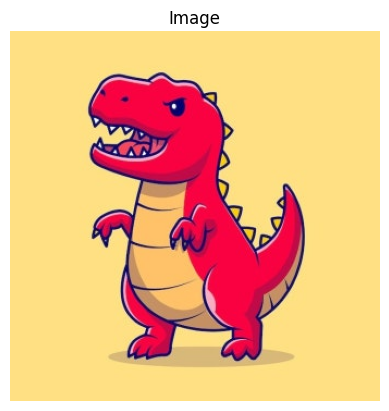

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = "/content/dinosaur.jpg"

image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    print("width: {} pixels".format(image.shape[1]))
    print("height: {} pixels".format(image.shape[0]))
    print("channels: {}".format(image.shape[2]))

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image")
    plt.axis("off")
    plt.show()

Saving dinosaur.jpg to dinosaur (2).jpg


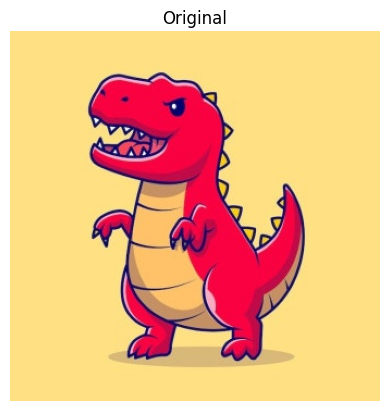

Pixel at (0, 0) – Red: 255, Green: 224, Blue: 131
Pixel at (0, 0) – Red: 255, Green: 0, Blue: 0


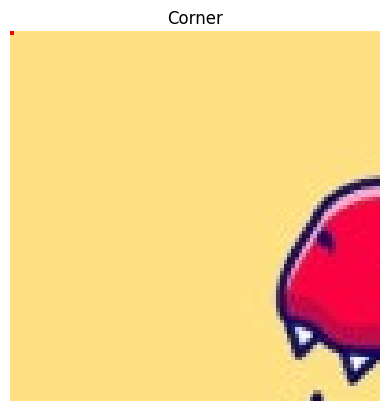

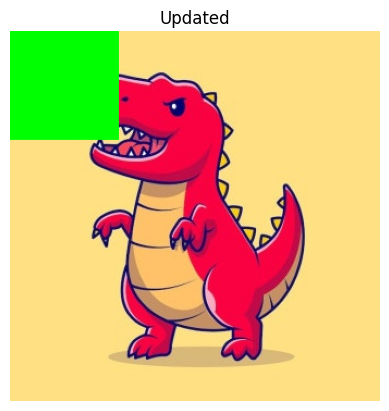

In [21]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

def show_image(title, img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image("Original", image)

(b, g, r) = image[0, 0]
print("Pixel at (0, 0) – Red: {}, Green: {}, Blue: {}".format(r, g, b))

image[0, 0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) – Red: {}, Green: {}, Blue: {}".format(r, g, b))

corner = image[0:100, 0:100]
show_image("Corner", corner)

image[0:100, 0:100] = (0, 255, 0)
show_image("Updated", image)


Saving dinosaur.jpg to dinosaur (3).jpg


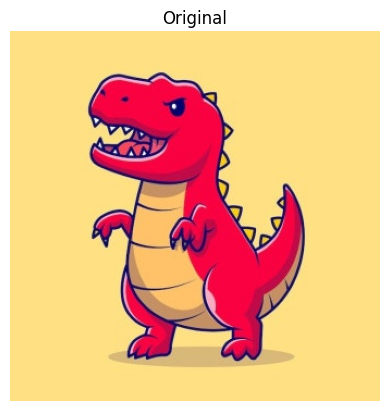

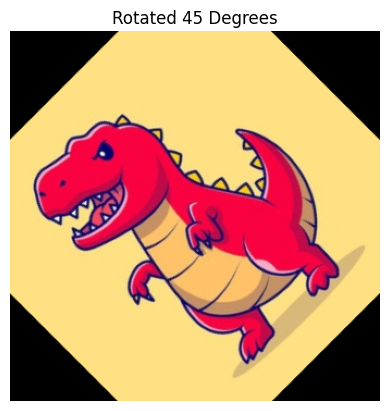

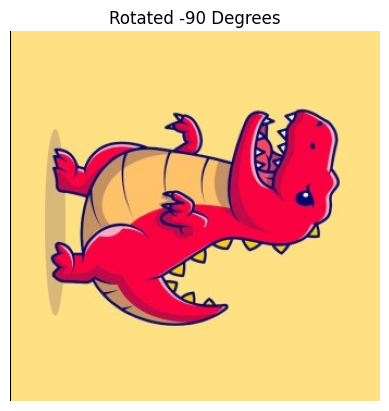

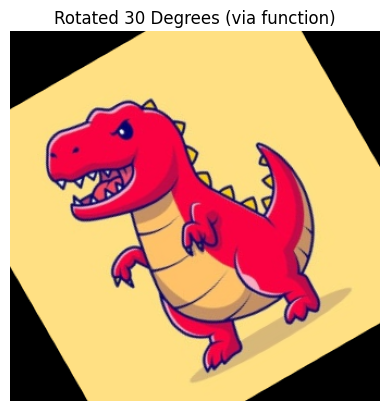

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

(h, w) = image.shape[:2]
center = (w // 2, h // 2)

M1 = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(image, M1, (w, h))

M2 = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated_m90 = cv2.warpAffine(image, M2, (w, h))

def rotate(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

rotated_30 = rotate(image, 30)

def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(image, "Original")
show_image(rotated_45, "Rotated 45 Degrees")
show_image(rotated_m90, "Rotated -90 Degrees")
show_image(rotated_30, "Rotated 30 Degrees (via function)")


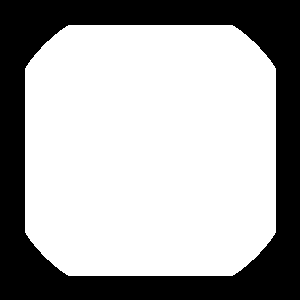

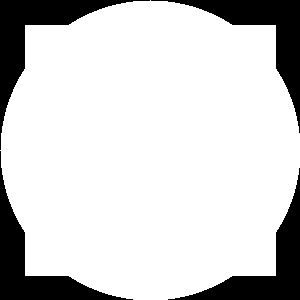

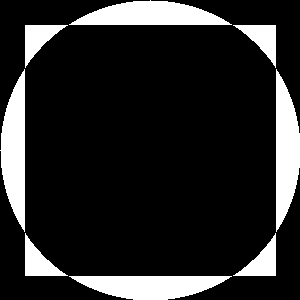

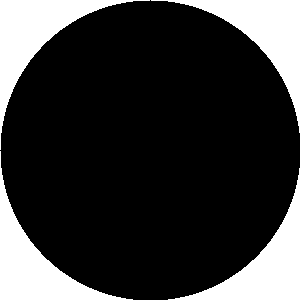

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)

bitwiseAnd = cv2.bitwise_and(rectangle, circle)
bitwiseOr = cv2.bitwise_or(rectangle, circle)
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
bitwiseNot = cv2.bitwise_not(circle)

cv2_imshow(bitwiseAnd)
cv2_imshow(bitwiseOr)
cv2_imshow(bitwiseXor)
cv2_imshow(bitwiseNot)
cv2.waitKey(0)
cv2.destroyAllWindows()